# Morningstar Risk Rating Analysis
--------
Investments <br>
Dartmouth College, Winter 2019

Team #1 - Michael Hanely, Scott Calnan, Katie Donovan, Spencer Bertsch, Olafur Olaffson,  

In this script we use a web scraper to gather daily historical closing prices of ten American mutual funds, two of which have a one-star Morningstar risk rating, two have two stars, and two have three, four, and five stars. These funds are then analyzed along with the scoring method used by Morningstar. 

## Imports

Standard vector based computation libraries in addition to packages necessary for web scraping, data analytics, and plotting

In [288]:
import pandas as pd
import numpy as np

import quandl
import pystan
import pytrends

import datetime as dt
import pandas_datareader as web

import matplotlib.pyplot as plt
import matplotlib

import time 

In [262]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime.now()

Tickers = ['FDGRX', 'PMEGX', 'FLPSX', 'TRMCX', 'RSVAX', 'ODMCX', 'MSSGX', 'MPSSX', 'PAGRX', 'SCMVX']
tickers = Tickers

#df = web.DataReader("VMVAX", 'yahoo', start, end)
df = web.DataReader('WHIBX', 'yahoo', start, end)



## Find height and length of target closing price matrix 

Note, we change 'height' by changing the 'start' time from which we begin scraping data

In [195]:
#Note, we change 'height' by changing the 'start' time from which we begin scraping data
#Find height and width of storage matrix 
test_length = web.DataReader('WHIBX', 'yahoo', start, end)
height = test_length.shape[0]
length = len(Tickers)
length = 1

print('Number of stock prices retrieved:', height)

Number of stock prices retrieved: 3309


## Scrape and store data in initialized matrix

In [196]:
#initialize storage matrix 
close_price_data = pd.DataFrame(np.zeros((height, length)))
print("Fund return matrix has dimensionality:", height, length)

tic = time.time()
for i in range (len(Tickers)):
    
    #scrape fund values from yahoo
    df = web.DataReader(Tickers[i], 'yahoo', start, end)
    #exrtract close prices from matrix 
    close_price_vector = df.iloc[:, 5]
    #convert to dataframe for concatenation
    temp_price_vec = pd.DataFrame(close_price_vector)
    #store close price vector outside loop 
    close_price_data = pd.concat([close_price_data, close_price_vector], axis = 1)
    
    print("...Gathering data on fund:", Tickers[i], "...")
    print(close_price_vector.head(3))
    print(close_price_data.shape) 

toc = time.time()

Fund return matrix has dimensionality: 3309 1
...Gathering data on fund: FDGRX ...
Date
2006-01-03    4.383930
2006-01-04    4.435291
2006-01-05    4.455565
Name: Adj Close, dtype: float64
(6618, 2)
...Gathering data on fund: PMEGX ...
Date
2006-01-03    13.688994
2006-01-04    13.820620
2006-01-05    13.836415
Name: Adj Close, dtype: float64
(6618, 3)
...Gathering data on fund: FLPSX ...
Date
2006-01-03    16.985451
2006-01-04    17.141167
2006-01-05    17.149363
Name: Adj Close, dtype: float64
(6618, 4)
...Gathering data on fund: TRMCX ...
Date
2006-01-03    9.219388
2006-01-04    9.281815
2006-01-05    9.250602
Name: Adj Close, dtype: float64
(6618, 5)
...Gathering data on fund: RSVAX ...
Date
2006-01-03     9.951518
2006-01-04    10.015538
2006-01-05     9.967520
Name: Adj Close, dtype: float64
(6618, 6)
...Gathering data on fund: ODMCX ...
Date
2006-01-03    6.213886
2006-01-04    6.281904
2006-01-05    6.285907
Name: Adj Close, dtype: float64
(6618, 7)
...Gathering data on fund: 

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: Cannot compare type 'Timestamp' with type 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [197]:
# We can use the 'time' package to measure how long it takes to train the model
train_time = toc - tic
secs = train_time%60
mins = (train_time - secs)/60

print('Time taken to scrape data was:', mins, 'minutes and', secs, 'seconds.')

Time taken to scrape data was: 0.0 minutes and 10.281468152999878 seconds.


## Prune resulting matrix for final dataframe 

Final df will contain closing prices for all of the funds with tickers stored in the vector 'Tickers'

In [198]:
#Prune resulting matrix
#Delete first 'height' rows of dataframe
df1 = close_price_data.iloc[height:]
#delete column of NANs leftover from initialization
df2 = df1.drop(0, 1)

We can now observe the first five rows of our final matrix containing the columns which represent the 

In [199]:
#Resulting Matrix
results = df2
results.head(5)
#results.shape

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
2006-01-03 00:00:00,4.383930,13.688994,16.985451,9.219388,9.951518,6.213886,4.439095,7.351733,25.775120,8.452030
2006-01-04 00:00:00,4.435291,13.820620,17.141167,9.281815,10.015538,6.281904,4.490198,7.405751,26.000015,8.496157
2006-01-05 00:00:00,4.455565,13.836415,17.149363,9.250602,9.967520,6.285907,4.456129,7.425395,26.074186,8.540281
2006-01-06 00:00:00,4.528552,14.010160,17.292789,9.336436,10.055552,6.341925,4.490198,7.508883,26.478531,8.592429
2006-01-09 00:00:00,4.563694,14.089136,17.419819,9.387156,10.075560,6.389940,4.544707,7.553082,26.772821,8.680680


In [ ]:
#Get S&P500 data for reference
SP500 = test_length = web.DataReader('^GSPC', 'yahoo', start, end)
SP500_data = SP500.iloc[:,5]

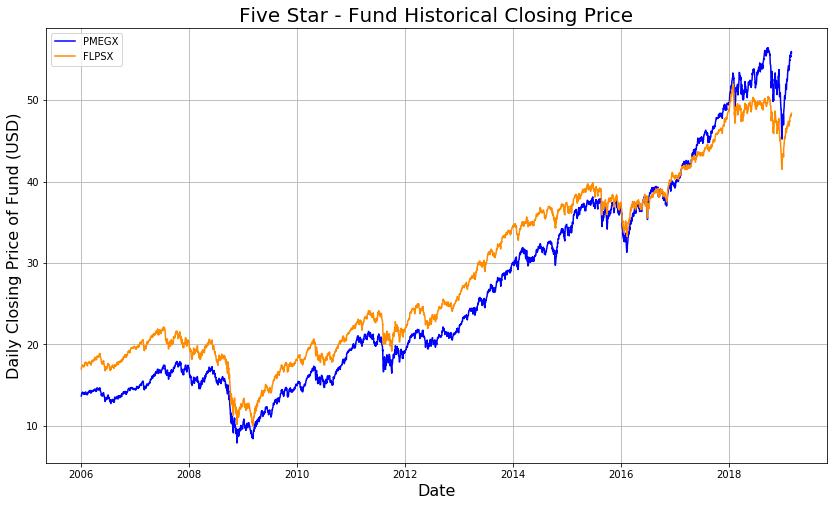

In [266]:
chosen_fund = 1
chosen_ticker = Tickers[chosen_fund]
chosen_ticker2 = Tickers[chosen_fund+1]

x = range(0,500)
y = range(0,1)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)

plt.plot(results.iloc[:,chosen_fund], 'b', label=chosen_ticker)
plt.plot(results.iloc[:,(chosen_fund+1)], 'darkorange', label=chosen_ticker2)
#plt.plot(SP500_data, 'r-', label='S&P 500')
plt.legend(loc='upper left');
plt.xlabel('Date', fontsize = '16')
plt.ylabel('Daily Closing Price of Fund (USD)', fontsize = '16')
plt.title('Five Star - Fund Historical Closing Price', fontsize = '20')
plt.grid() 

# Analysis of Risk Rating
------

## Average Returns

In [338]:
# Load CSV file from bloomberg for factors
path1='/Users/spencerbertsch/Desktop/Investments/Final Project/INVFundsTimeData.csv'
df = pd.read_csv(path1)

path2='/Users/spencerbertsch/Desktop/Investments/Final Project/Correlations.csv'
correlation_data = pd.read_csv(path2)

df.head(5)

,Unnamed: 0,FDGRX US Equity,PMEGX US Equity,FLPSX US Equity,TRMCX US Equity,RSVAX US Equity,ODMCX US Equity,MSSGX US Equity,MPSSX US Equity,PAGRX US Equity,SCMVX US Equity,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1/31/01,-2.1435,3.7802,6.6609,2.0460,2.3593,1.4706,6.4604,3.0253,7.0388,12.4835,3.13,5.81,-4.90,-4.43,-6.54,0.54
1,2/28/01,-16.0476,-7.8193,-0.6488,-0.5639,-0.4433,-5.6897,-15.0427,-7.2222,-7.8172,-4.3453,-10.05,2.66,12.90,9.00,9.58,0.38
2,3/30/01,-10.5227,-9.9579,-1.9184,-3.5287,-2.5824,-7.7405,-12.1730,-5.0470,-7.8068,-4.7268,-7.26,2.31,6.45,3.38,3.95,0.42
3,4/30/01,11.8366,13.5752,6.5751,6.4010,2.5594,10.0555,13.2875,9.5495,10.7990,5.8634,7.94,-0.64,-4.69,-2.71,-3.97,0.39
4,5/31/01,0.3073,1.2365,3.3971,3.3763,4.9020,1.6256,1.0111,2.0559,3.1179,5.2343,0.72,3.58,3.14,0.18,2.19,0.32


In [255]:
fivestar =df.iloc[:, 1:3]
five_star_avg = fivestar.mean()

fourstar =df.iloc[:, 3:5]
four_star_avg = fourstar.mean()

threestar =df.iloc[:, 5:7]
three_star_avg = threestar.mean()

twostar =df.iloc[:, 7:9]
two_star_avg = twostar.mean()

onestar =df.iloc[:, 9:11]
one_star_avg = onestar.mean()

five_star_average_return = ((five_star_avg[0] + five_star_avg[1])/2)
four_star_average_return = ((four_star_avg[0] + four_star_avg[1])/2)
three_star_average_return = ((three_star_avg[0] + three_star_avg[1])/2)
two_star_average_return = ((two_star_avg[0] + two_star_avg[1])/2)
one_star_average_return = ((one_star_avg[0] + one_star_avg[1])/2)

print("Five star rated fund return:", five_star_average_return)
print("Four star rated fund return:", four_star_average_return)
print("Three star rated fund return:", three_star_average_return)
print("Two star rated fund return:", two_star_average_return)
print("One star rated fund return:", one_star_average_return)

Five star rated fund return: 0.874926721438636
Four star rated fund return: 0.9409100376659093
Three star rated fund return: 0.7686285130568182
Two star rated fund return: 0.7383682811318182
One star rated fund return: 0.8527005435681818


This initial analysis would be much more informative if we had data for many, many more funds. Becasue we only have data for two funds of each morningstar rating, we can't draw signigicant conclusions from these results. Still, if the dataset were much larger (1000 funds instead of 10), we could use this same methodology to determine whether or not the funds consistently rated higher by morningstar outperformed lower rated funds. 

## Volatility

In [280]:
#Label each pandas column header
df_temp = results
header = ['FDGRX', 'PMEGX', 'FLPSX', 'TRMCX', 'RSVAX', 'ODMCX', 'MSSGX', 'MPSSX', 'PAGRX', 'SCMVX']                  
df_temp.columns = header

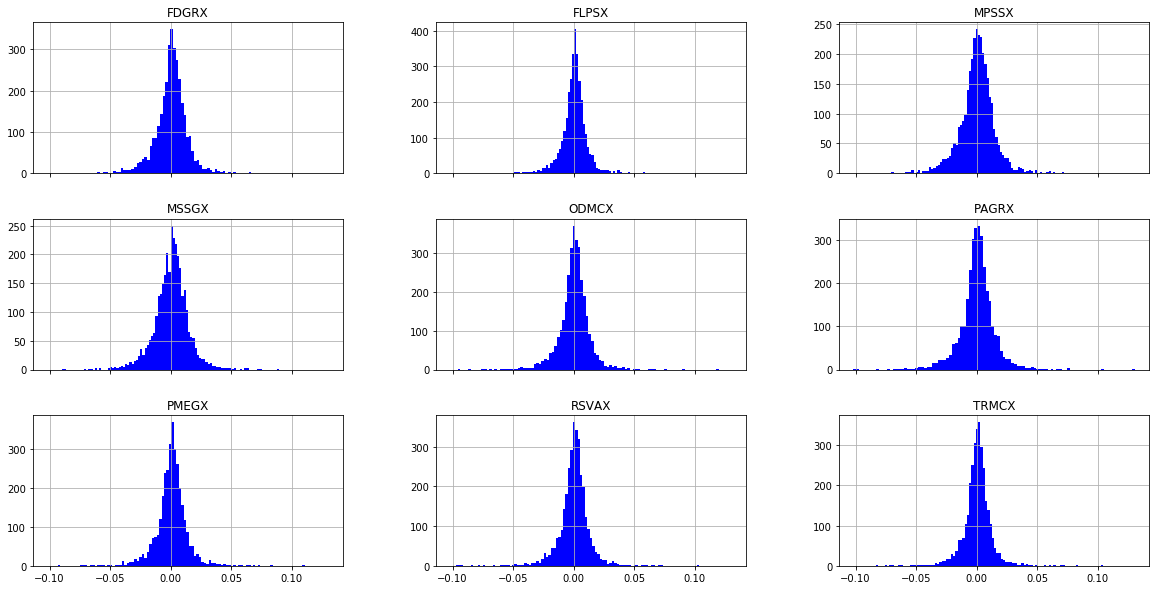

In [370]:
# Calculate the daily percentage change for `daily_close_px`
daily_fund_pct_change = df_temp.iloc[:,:9].pct_change()
# Plot the distributions
daily_fund_pct_change.hist(bins=100, sharex=True, figsize=(20,10), color='blue')

# Show the resulting plot
plt.show()

We can see that there is no appreciable difference in the variance (volatility) between the funds with five star ratings and those with lower ratings. This study would again be greatly imporved by increasing the size of the dataset, but this methodology could be used with much more data in oder to test the average volatility for five, four, three, two, and one star rated funds. 

## Covariance between funds and market factors

In [353]:
correlation_matrix = correlation_data.drop(['Unnamed: 0'], axis=1)
headers = list(correlation_matrix.columns.values)

correlation_data.head(5)

,Unnamed: 0,FDGRX US Equity,PMEGX US Equity,FLPSX US Equity,TRMCX US Equity,RSVAX US Equity,ODMCX US Equity,MSSGX US Equity,MPSSX US Equity,PAGRX US Equity,SCMVX US Equity,Mkt-RF,SMB,HML,RMW,CMA,RF,UMD
0,FDGRX US Equity,1.00,0.94,0.83,0.82,0.77,0.90,0.89,0.84,0.90,0.72,0.93,0.30,-0.19,-0.64,-0.30,-0.11,-0.36
1,PMEGX US Equity,0.94,1.00,0.92,0.92,0.88,0.96,0.91,0.91,0.94,0.80,0.95,0.41,-0.04,-0.58,-0.21,-0.08,-0.41
2,FLPSX US Equity,0.83,0.92,1.00,0.95,0.91,0.94,0.85,0.91,0.92,0.87,0.92,0.48,0.17,-0.49,-0.04,-0.04,-0.43
3,TRMCX US Equity,0.82,0.92,0.95,1.00,0.90,0.94,0.83,0.91,0.92,0.89,0.93,0.45,0.25,-0.49,0.03,-0.06,-0.47
4,RSVAX US Equity,0.77,0.88,0.91,0.90,1.00,0.92,0.79,0.86,0.86,0.82,0.86,0.45,0.18,-0.44,-0.02,-0.07,-0.32


In [354]:
correlation_matrix = correlation_data.drop(['Unnamed: 0'], axis=1)

print(correlation_matrix.shape)
correlation_matrix

(17, 17)


,FDGRX US Equity,PMEGX US Equity,FLPSX US Equity,TRMCX US Equity,RSVAX US Equity,ODMCX US Equity,MSSGX US Equity,MPSSX US Equity,PAGRX US Equity,SCMVX US Equity,Mkt-RF,SMB,HML,RMW,CMA,RF,UMD
0,1.000000,0.940000,0.83000,0.820000,0.770000,0.900000,0.890000,0.840000,0.900000,0.720000,0.930000,0.300000,-0.190000,-0.640000,-0.300000,-0.110000,-0.36
1,0.940000,1.000000,0.92000,0.920000,0.880000,0.960000,0.910000,0.910000,0.940000,0.800000,0.950000,0.410000,-0.040000,-0.580000,-0.210000,-0.080000,-0.41
2,0.830000,0.920000,1.00000,0.950000,0.910000,0.940000,0.850000,0.910000,0.920000,0.870000,0.920000,0.480000,0.170000,-0.490000,-0.040000,-0.040000,-0.43
3,0.820000,0.920000,0.95000,1.000000,0.900000,0.940000,0.830000,0.910000,0.920000,0.890000,0.930000,0.450000,0.250000,-0.490000,0.030000,-0.060000,-0.47
4,0.770000,0.880000,0.91000,0.900000,1.000000,0.920000,0.790000,0.860000,0.860000,0.820000,0.860000,0.450000,0.180000,-0.440000,-0.020000,-0.070000,-0.32
5,0.900000,0.960000,0.94000,0.940000,0.920000,1.000000,0.890000,0.930000,0.940000,0.840000,0.950000,0.440000,0.070000,-0.510000,-0.120000,-0.090000,-0.36
6,0.890000,0.910000,0.85000,0.830000,0.790000,0.890000,1.000000,0.900000,0.870000,0.780000,0.890000,0.520000,-0.090000,-0.600000,-0.270000,-0.080000,-0.39
7,0.840000,0.910000,0.91000,0.910000,0.860000,0.930000,0.900000,1.000000,0.900000,0.880000,0.900000,0.630000,0.150000,-0.500000,-0.090000,-0.070000,-0.31
8,0.900000,0.940000,0.92000,0.920000,0.860000,0.940000,0.870000,0.900000,1.000000,0.840000,0.950000,0.410000,0.070000,-0.560000,-0.130000,-0.050000,-0.44
9,0.720000,0.800000,0.87000,0.890000,0.820000,0.840000,0.780000,0.880000,0.840000,1.000000,0.820000,0.610000,0.310000,-0.540000,0.070000,-0.060000,-0.48


In [355]:
type(correlation_matrix.values[1,1])

numpy.float64

In [356]:
len(farmers)

18

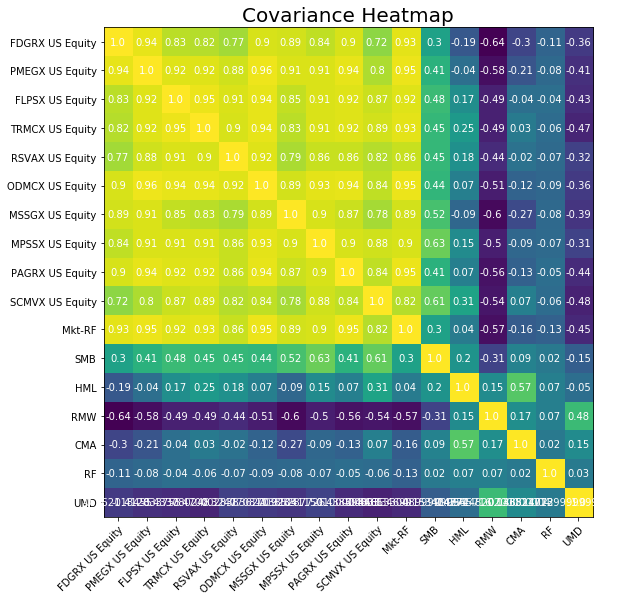

In [371]:
data = correlation_matrix.values

#fig = plt.figure(figsize=(8, 8))
#ax1 = fig.add_subplot(111)

fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(headers)))
ax.set_yticks(np.arange(len(headers)))
# ... and label them with the respective list entries
ax.set_xticklabels(headers)
ax.set_yticklabels(headers)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(headers)):
    for j in range(len(headers)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Covariance Heatmap", fontsize = 20)
#fig.tight_layout()
plt.show()

We can see from the above covariance matrix that, as expected, our chosen index funds are highly correlated with eachother. We can also see that each fund is strongly negatively correlated with RMW, and relatively highly correlated with SMB. By expanding this analysis to a larger amount of funds, we could develop a more complete analysis of which market factors are used more by morningstar to rate the funds in question. Still, it's useful to see the relative correlation of differently rated funds with each of the FF5 and momentum factors. 

Note that, with this limited number of funds being analyzed, there is no appreciable difference in correlation with market factors for funds with different morningstar ratings. 

